In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('Microsoft.csv')
data = data[['Date','Adj Close','Volume']]
data.head()

Date  Adj Close    Volume
0  2014-09-03  40.246719  33684500
1  2014-09-04  40.515274  26475500
2  2014-09-05  41.097130  36939400
3  2014-09-08  41.598427  45736700
4  2014-09-09  41.858036  40302400

[]

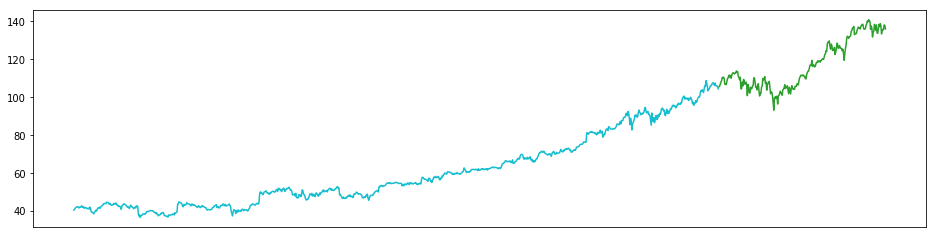

In [8]:
fig,ax = plt.subplots(figsize = (16,4))
ax.plot(data[:1000]['Date'],data[:1000]['Adj Close'],'C9')
ax.plot(data[1000:]['Date'],data[1000:]['Adj Close'],'C2')
ax.set_xticks([])

In [9]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [10]:
def prev_avg(data,n):
    if n==0:
        prev_avg = float(data.iloc[0]['Adj Close'])
    elif n<10:
        prev_avg = float(data[:n].mean()['Adj Close'])
    else:
        prev_avg = float(data[n-10:n].mean()['Adj Close'])
    data['Prev_Avg'].loc[n] = prev_avg
    #return prev_avg

In [13]:
_avg = np.zeros(data.size)
data['Prev_Avg'] = pd.Series(_avg)
#_avg[2] = prev_avg(data_new,2)
#_avg
#float(data.iloc[0]['Adj Close'])

In [31]:
for n in range(1000):
    prev_avg(data,n)

In [35]:
#data.loc[1092]

Date         2019-01-04
Adj Close       100.787
Volume         44060600
Prev_Avg        98.8565
Name: 1092, dtype: object

In [36]:
model = LinearRegression()
#data_new.drop('Date',axis=1,inplace=True)
X_train = data[:1000][['Prev_Avg','Volume']]
X_test = data[1000:][['Prev_Avg','Volume']]
y_train = data[:1000]['Adj Close']
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
pred = model.predict(X_test.iloc[5:6])
X_test['Prev_Avg']

1000    106.286551
1001    106.088634
1002    105.922290
1003    105.904356
1004    106.082047
           ...    
1254    136.300998
1255    136.060999
1256    136.218999
1257    136.662999
1258    136.835999
Name: Prev_Avg, Length: 259, dtype: float64

In [ ]:
for i in range(X_test.size):
    pred = model.predict(X_test.iloc[i:i+1])
    X_test['Prev_Avg']
    

In [224]:
preds = np.zeros(X_test.size)
for i in range(X_test.size):
    


Day Month  Year    Prev_Avg
1000  22    08  2018  106.286551
1001  23    08  2018  106.088634
1002  24    08  2018  105.922290
1003  27    08  2018  105.904356
1004  28    08  2018  106.082047

[]

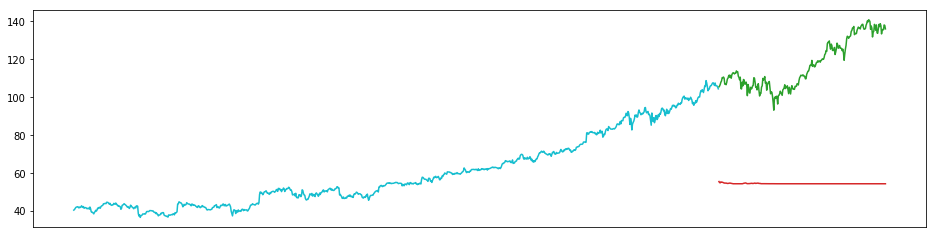

In [222]:
fig,ax = plt.subplots(figsize = (16,4))
ax.plot(data_copy[:1000]['Date'],data[:1000]['Adj Close'],'C9')
ax.plot(data_copy[1000:]['Date'],data[1000:]['Adj Close'],'C2')
#ax.plot(data_new['Prev_Avg'],'C5')
ax.plot(data_copy[1000:]['Date'],preds,'C3')
ax.set_xticks([])

In [100]:
pred_value = list(data[:1000]['Adj Close'])
for date in range(1000,len(data['Date'])):
    weighted_sum = 0;i=0
    for num in range(25):
        weighted_sum += (25-i)*pred_value[(len(pred_value)-1)-i]
        i+=1
    weighted_average = weighted_sum/324
    pred_value.append(weighted_average)

[]

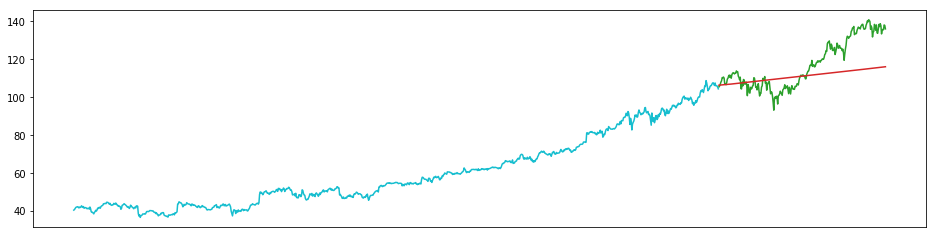

In [101]:
fig,ax = plt.subplots(figsize = (16,4))
ax.plot(data[:1000]['Date'],data[:1000]['Adj Close'],'C9')
ax.plot(data[1000:]['Date'],data[1000:]['Adj Close'],'C2')
ax.plot(data[1000:]['Date'],pred_value[1000:],'C3')
ax.set_xticks([])

In [124]:
from sklearn.linear_model import LinearRegression
model_li = LinearRegression()
model_li.fit(X_train,y_train)
preds = model.predict(X_test)

[]

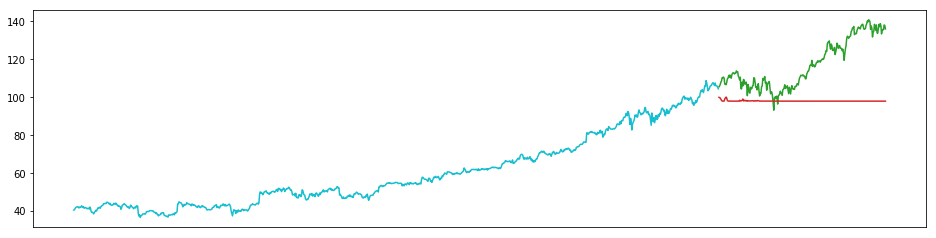

In [125]:
fig,ax = plt.subplots(figsize = (16,4))
ax.plot(data[:1000]['Date'],data[:1000]['Adj Close'],'C9')
ax.plot(data[1000:]['Date'],data[1000:]['Adj Close'],'C2')
ax.plot(data[1000:]['Date'],preds,'C3')
ax.set_xticks([])